In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.model_selection import KFold
from sklearn.svm import SVC
import seaborn as sns
from sklearn.preprocessing import LabelEncoder 

%matplotlib inline

In [ ]:
#Read Data

In [3]:

data_1=pd.read_csv("bank-additional-full.csv",sep=";")
data_2=pd.read_csv("bank-additional.csv",sep=";")
data=pd.concat([data_1,data_2],axis=0)
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


Text(0.5, 1, 'Variable Correlation')

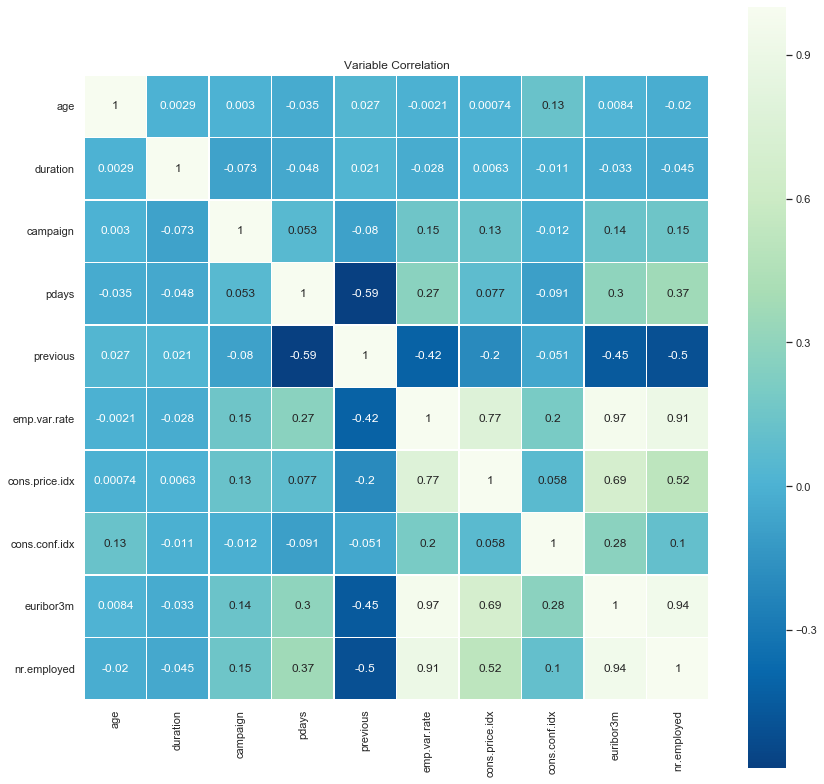

In [174]:
#Correlation Plot
plt.figure(figsize=(14,14))
sns.set(font_scale=1)
sns.heatmap(data.corr(),cmap='GnBu_r',annot=True, square = True ,linewidths=.5);
plt.title('Variable Correlation')

In [4]:
#To avoid mulicorinality drop the higly correltaed column
data = data.drop(["emp.var.rate","nr.employed"],axis=1)
data.head()


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,cons.price.idx,cons.conf.idx,euribor3m,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,93.994,-36.4,4.857,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,93.994,-36.4,4.857,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,93.994,-36.4,4.857,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,93.994,-36.4,4.857,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,93.994,-36.4,4.857,no


In [5]:
#label encoding

jobDummies = pd.get_dummies(data['job'], prefix = 'job')
maritalDummies = pd.get_dummies(data['marital'], prefix = 'marital')
educationDummies = pd.get_dummies(data['education'], prefix = 'education')
defaultDummies = pd.get_dummies(data['default'], prefix = 'default')
housingDummies = pd.get_dummies(data['housing'], prefix = 'housing')
loanDummies = pd.get_dummies(data['loan'], prefix = 'loan')
contactDummies = pd.get_dummies(data['contact'], prefix = 'contact')
poutcomeDummies = pd.get_dummies(data['poutcome'], prefix = 'poutcome')
data['month']=data['month'].astype('category')
data['day_of_week']=data['day_of_week'].astype('category')
data['y']=data['y'].astype('category')

# Assigning numerical values and storing in another column
data['month'] = data['month'].cat.codes
data['day_of_week'] = data['day_of_week'].cat.codes
data['y'] = data['y'].cat.codes

data['y'].dtype

dtype('int8')

In [6]:
data["age"]=data["age"].astype("int")
data["duration"]=data["duration"].astype("int")
data["pdays"]=data["pdays"].astype("int")
data["previous"]=data["previous"].astype("int")
data["campaign"]=data["campaign"].astype("int")
data_int=data.select_dtypes(include=['int','float64','bool'])
#data_int
bank_df=pd.concat([data_int,jobDummies,maritalDummies,educationDummies,defaultDummies,housingDummies,loanDummies
                  ,contactDummies,poutcomeDummies,data['month'],data['day_of_week'],data['y']],axis=1)
bank_df.head()

,age,duration,campaign,pdays,previous,cons.price.idx,cons.conf.idx,euribor3m,job_admin.,job_blue-collar,...,loan_unknown,loan_yes,contact_cellular,contact_telephone,poutcome_failure,poutcome_nonexistent,poutcome_success,month,day_of_week,y
0,56,261,1,999,0,93.994,-36.4,4.857,0,0,...,0,0,0,1,0,1,0,6,1,0
1,57,149,1,999,0,93.994,-36.4,4.857,0,0,...,0,0,0,1,0,1,0,6,1,0
2,37,226,1,999,0,93.994,-36.4,4.857,0,0,...,0,0,0,1,0,1,0,6,1,0
3,40,151,1,999,0,93.994,-36.4,4.857,1,0,...,0,0,0,1,0,1,0,6,1,0
4,56,307,1,999,0,93.994,-36.4,4.857,0,0,...,0,1,0,1,0,1,0,6,1,0


In [6]:
#Predictors count
bank_df.groupby('y').size()

y
0    40216
1     5091
dtype: int64

In [7]:
#Total features after one-hot-encoding
features = bank_df.columns
len(features)

49

In [7]:
#Variables and Output
y=np.array(bank_df["y"])
X=np.array(bank_df.iloc[:,0:48])


int8


array([[ 56., 261.,   1., ...,   0.,   6.,   1.],
       [ 57., 149.,   1., ...,   0.,   6.,   1.],
       [ 37., 226.,   1., ...,   0.,   6.,   1.],
       ...,
       [ 27.,  64.,   2., ...,   0.,   6.,   1.],
       [ 58., 528.,   1., ...,   0.,   1.,   0.],
       [ 34., 175.,   1., ...,   0.,   7.,   4.]])

In [8]:
#Partition of Dataset
from sklearn.model_selection import train_test_split

X_train_80, X_test, y_train_80, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

X_train, X_val, y_train, y_val = train_test_split(X_train_80, y_train_80, test_size=0.2, random_state=1)

In [ ]:
#Initial Run for entire dataset without cross validation

In [210]:
from sklearn.svm import SVC
svm_linear = SVC(kernel='linear')
svm_linear.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [211]:
y_pred_t = svm_linear.predict(X_test)

In [212]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test,y_pred_t))
print(classification_report(y_test,y_pred_t))

[[7805  240]
 [ 596  421]]
              precision    recall  f1-score   support

           0       0.93      0.97      0.95      8045
           1       0.64      0.41      0.50      1017

    accuracy                           0.91      9062
   macro avg       0.78      0.69      0.73      9062
weighted avg       0.90      0.91      0.90      9062



In [213]:
y_pred_v = svm_linear.predict(X_val)

In [214]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_val,y_pred_v))
print(classification_report(y_val,y_pred_v))

[[6267  185]
 [ 455  342]]
              precision    recall  f1-score   support

           0       0.93      0.97      0.95      6452
           1       0.65      0.43      0.52       797

    accuracy                           0.91      7249
   macro avg       0.79      0.70      0.73      7249
weighted avg       0.90      0.91      0.90      7249



In [6]:
#Run Linear SVC with Cross Validation

In [215]:

scores = []
n=10
i=0
mean_auc=0
accuracy_test=0
accuracy_train=0
svm_linear_cv = SVC(kernel='linear')
cv = KFold(n_splits=n, random_state=42, shuffle=False)
#print(cv.split(X_train_80))

In [216]:
for train_index, test_index in cv.split(X_train_80):
    print("Train Index: ", train_index)
    print("Test Index: ", test_index)
    X_train_cv, X_test_cv= X_train_80[train_index], X_train_80[test_index]
    y_train_cv, y_test_cv = y_train_80[train_index], y_train_80[test_index]

    
    # train model and make predictions
    svm_linear_cv.fit(X_train_cv, y_train_cv) 
    
    #predict train
    preds_train = svm_linear_cv.predict(X_train_cv)

    #predict test
    preds_test = svm_linear_cv.predict(X_test_cv)
    
    i+=1
    # compute AUC metric for this CV fold
    fpr, tpr, thresholds = metrics.roc_curve(y_test_cv, preds_test)
    roc_auc = metrics.auc(fpr, tpr)
    print ("AUC (fold "+str(i)+"/"+str(n)+"): "+str(roc_auc))
    mean_auc += roc_auc
    
    print("Accuracy Test Fold "+str(i)+" : "+str(metrics.accuracy_score(y_test_cv,preds_test)*100))
    accuracy_test+=metrics.accuracy_score(y_test_cv,preds_test)*100
    print("Accuracy Train Fold "+str(i)+" : "+str(metrics.accuracy_score(y_train_cv,preds_train)*100))
    accuracy_train+=metrics.accuracy_score(y_train_cv,preds_train)*100
    print( " ")
    
print ("Mean AUC: "+str(mean_auc/n) )
print ("Mean Test Accuracy: "+str(accuracy_test/n))
print ("Mean Train Accuracy: "+str(accuracy_train/n))

Train Index:  [ 3625  3626  3627 ... 36242 36243 36244]
Test Index:  [   0    1    2 ... 3622 3623 3624]
AUC (fold 1/10): 0.6838176817185214
Accuracy Test Fold 1 : 90.04137931034482
Accuracy Train Fold 1 : 90.29736358062537
 
Train Index:  [    0     1     2 ... 36242 36243 36244]
Test Index:  [3625 3626 3627 ... 7247 7248 7249]
AUC (fold 2/10): 0.6788730960740079
Accuracy Test Fold 2 : 90.37241379310345
Accuracy Train Fold 2 : 90.33415082771306
 
Train Index:  [    0     1     2 ... 36242 36243 36244]
Test Index:  [ 7250  7251  7252 ... 10872 10873 10874]
AUC (fold 3/10): 0.6926364985141474
Accuracy Test Fold 3 : 89.98620689655172
Accuracy Train Fold 3 : 90.31882280809319
 
Train Index:  [    0     1     2 ... 36242 36243 36244]
Test Index:  [10875 10876 10877 ... 14497 14498 14499]
AUC (fold 4/10): 0.706498014225453
Accuracy Test Fold 4 : 91.55862068965517
Accuracy Train Fold 4 : 91.0453709380748
 
Train Index:  [    0     1     2 ... 36242 36243 36244]
Test Index:  [14500 14501 1450

In [ ]:
#Learning Curve Plot

C:\ProgramData\Anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


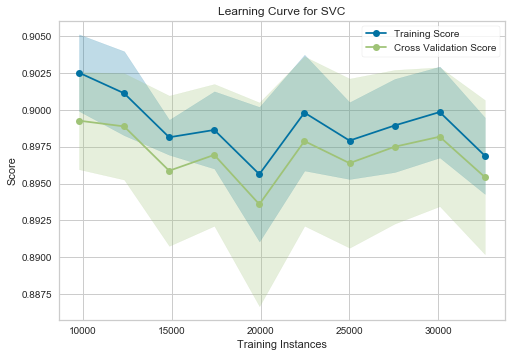

In [218]:
from yellowbrick.model_selection import LearningCurve
sizes = np.linspace(0.3, 1.0, 10)
visualizer = LearningCurve(
    svm_linear_cv, cv=cv, scoring='f1_weighted', train_sizes=sizes, n_jobs=4
)

visualizer.fit(X_train_80,y_train_80)        # Fit the data to the visualizer
visualizer.show() 

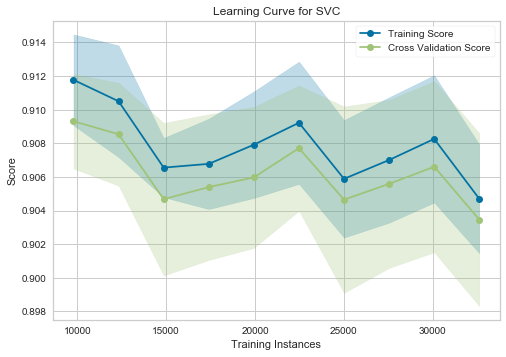

In [219]:
from yellowbrick.model_selection import LearningCurve
sizes = np.linspace(0.3, 1.0, 10)
visualizer = LearningCurve(
    svm_linear_cv, cv=cv, scoring='accuracy', train_sizes=sizes, n_jobs=4
)

visualizer.fit(X_train_80,y_train_80)        # Fit the data to the visualizer
visualizer.show() 

In [220]:
y_pred_1 = svm_linear_cv.predict(X_test)

In [221]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test,y_pred_1))
print(classification_report(y_test,y_pred_1))

[[7732  313]
 [ 596  421]]
              precision    recall  f1-score   support

           0       0.93      0.96      0.94      8045
           1       0.57      0.41      0.48      1017

    accuracy                           0.90      9062
   macro avg       0.75      0.69      0.71      9062
weighted avg       0.89      0.90      0.89      9062



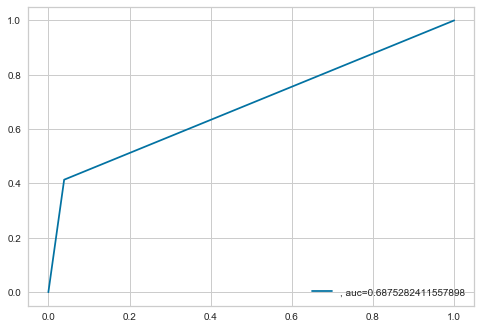

In [222]:
from sklearn import metrics
import matplotlib.pyplot as plt

fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_1)
auc = metrics.roc_auc_score(y_test, y_pred_1)
plt.plot(fpr,tpr,label=", auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [ ]:
#Run SVC with RBF Kernel using Cross Validation

In [223]:

scores = []
n=10
i=0
mean_auc=0
accuracy_test=0
accuracy_train=0
svm_rbf_cv = SVC(kernel='rbf')
cv = KFold(n_splits=n, random_state=42, shuffle=False)


In [224]:
for train_index, test_index in cv.split(X_train_80):
    print("Train Index: ", train_index)
    print("Test Index: ", test_index)
    X_train_cv, X_test_cv= X_train_80[train_index], X_train_80[test_index]
    y_train_cv, y_test_cv = y_train_80[train_index], y_train_80[test_index]

    # train model and make predictions
    svm_rbf_cv.fit(X_train_cv, y_train_cv) 
    
    #predict train
    preds_train = svm_rbf_cv.predict(X_train_cv)

    #predict test
    preds_test = svm_rbf_cv.predict(X_test_cv)
    
    i+=1
    # compute AUC metric for this CV fold
    fpr, tpr, thresholds = metrics.roc_curve(y_test_cv, preds_test)
    roc_auc = metrics.auc(fpr, tpr)
    print ("AUC (fold "+str(i)+"/"+str(n)+"): "+str(roc_auc))
    mean_auc += roc_auc
    
    print("Accuracy Test Fold "+str(i)+" : "+str(metrics.accuracy_score(y_test_cv,preds_test)*100))
    accuracy_test+=metrics.accuracy_score(y_test_cv,preds_test)*100
    print("Accuracy Train Fold "+str(i)+" : "+str(metrics.accuracy_score(y_train_cv,preds_train)*100))
    accuracy_train+=metrics.accuracy_score(y_train_cv,preds_train)*100
    print( " ")
    
print ("Mean AUC: "+str(mean_auc/n) )
print ("Mean Test Accuracy: "+str(accuracy_test/n))
print ("Mean Train Accuracy: "+str(accuracy_train/n))

Train Index:  [ 3625  3626  3627 ... 36242 36243 36244]
Test Index:  [   0    1    2 ... 3622 3623 3624]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


AUC (fold 1/10): 0.6343345445704502
Accuracy Test Fold 1 : 89.90344827586206
Accuracy Train Fold 1 : 96.44389944819129
 
Train Index:  [    0     1     2 ... 36242 36243 36244]
Test Index:  [3625 3626 3627 ... 7247 7248 7249]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


AUC (fold 2/10): 0.6399156165316174
Accuracy Test Fold 2 : 90.95172413793104
Accuracy Train Fold 2 : 96.4316370324954
 
Train Index:  [    0     1     2 ... 36242 36243 36244]
Test Index:  [ 7250  7251  7252 ... 10872 10873 10874]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


AUC (fold 3/10): 0.6216103302268836
Accuracy Test Fold 3 : 89.62758620689655
Accuracy Train Fold 3 : 96.34580012262415
 
Train Index:  [    0     1     2 ... 36242 36243 36244]
Test Index:  [10875 10876 10877 ... 14497 14498 14499]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


AUC (fold 4/10): 0.6314723517865645
Accuracy Test Fold 4 : 90.20689655172414
Accuracy Train Fold 4 : 96.42244022072349
 
Train Index:  [    0     1     2 ... 36242 36243 36244]
Test Index:  [14500 14501 14502 ... 18122 18123 18124]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


AUC (fold 5/10): 0.647779673435368
Accuracy Test Fold 5 : 90.3448275862069
Accuracy Train Fold 5 : 96.364193746168
 
Train Index:  [    0     1     2 ... 36242 36243 36244]
Test Index:  [18125 18126 18127 ... 21746 21747 21748]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


AUC (fold 6/10): 0.6600959387732895
Accuracy Test Fold 6 : 90.7560706401766
Accuracy Train Fold 6 : 96.40415683148892
 
Train Index:  [    0     1     2 ... 36242 36243 36244]
Test Index:  [21749 21750 21751 ... 25370 25371 25372]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


AUC (fold 7/10): 0.6509663223981674
Accuracy Test Fold 7 : 90.45253863134658
Accuracy Train Fold 7 : 96.35204316238006
 
Train Index:  [    0     1     2 ... 36242 36243 36244]
Test Index:  [25373 25374 25375 ... 28994 28995 28996]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


AUC (fold 8/10): 0.6832310546596261
Accuracy Test Fold 8 : 91.55629139072848
Accuracy Train Fold 8 : 96.41641887127925
 
Train Index:  [    0     1     2 ... 36242 36243 36244]
Test Index:  [28997 28998 28999 ... 32618 32619 32620]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


AUC (fold 9/10): 0.6763336513103377
Accuracy Test Fold 9 : 91.30794701986756
Accuracy Train Fold 9 : 96.3459121424849
 
Train Index:  [    0     1     2 ... 32618 32619 32620]
Test Index:  [32621 32622 32623 ... 36242 36243 36244]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


AUC (fold 10/10): 0.6324553079706488
Accuracy Test Fold 10 : 89.59713024282561
Accuracy Train Fold 10 : 96.45320499065019
 
Mean AUC: 0.6478194791662952
Mean Test Accuracy: 90.47044606835655
Mean Train Accuracy: 96.39797065684857


In [225]:
y_pred_2 = svm_rbf_cv.predict(X_test)

In [226]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test,y_pred_2))
print(classification_report(y_test,y_pred_2))

[[7892  153]
 [ 710  307]]
              precision    recall  f1-score   support

           0       0.92      0.98      0.95      8045
           1       0.67      0.30      0.42      1017

    accuracy                           0.90      9062
   macro avg       0.79      0.64      0.68      9062
weighted avg       0.89      0.90      0.89      9062



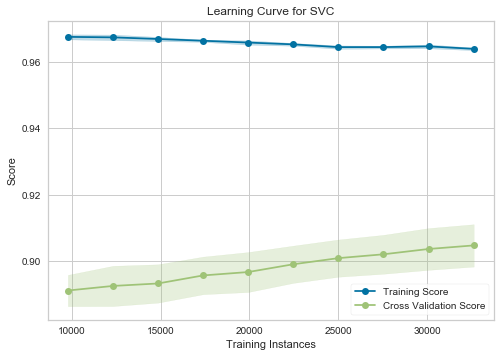

In [227]:
from yellowbrick.model_selection import LearningCurve
sizes = np.linspace(0.3, 1.0, 10)
visualizer = LearningCurve(
    svm_rbf_cv, cv=cv, scoring='accuracy', train_sizes=sizes, n_jobs=4
)

visualizer.fit(X_train_80,y_train_80)        # Fit the data to the visualizer
visualizer.show() 

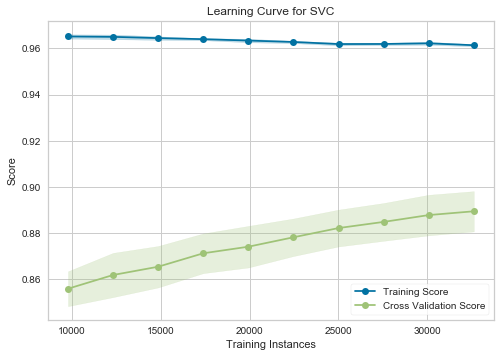

In [228]:
from yellowbrick.model_selection import LearningCurve
sizes = np.linspace(0.3, 1.0, 10)
visualizer = LearningCurve(
    svm_rbf_cv, cv=cv, scoring='f1_weighted', train_sizes=sizes, n_jobs=4
)

visualizer.fit(X_train_80,y_train_80)        # Fit the data to the visualizer
visualizer.show() 

In [ ]:
##Run SVC on Polynomial Kernel with Cross Validation

In [11]:

scores = []
n=10
i=0
mean_auc=0
accuracy_test=0
accuracy_train=0
svm_sig_cv = SVC(kernel='poly')
cv = KFold(n_splits=n, random_state=42, shuffle=False)
#print(cv.split(X_train_80))

In [ ]:
for train_index, test_index in cv.split(X_train_80):
    print("Train Index: ", train_index)
    print("Test Index: ", test_index)
    X_train_cv, X_test_cv= X_train_80[train_index], X_train_80[test_index]
    y_train_cv, y_test_cv = y_train_80[train_index], y_train_80[test_index]

    # train model and make predictions
    
    svm_sig_cv.fit(X_train_cv, y_train_cv) 
    
    #predict train
    preds_train = svm_sig_cv.predict(X_train_cv)

    #predict test
    preds_test = svm_sig_cv.predict(X_test_cv)
    
    i+=1
    # compute AUC metric for this CV fold
    fpr, tpr, thresholds = metrics.roc_curve(y_test_cv, preds_test)
    roc_auc = metrics.auc(fpr, tpr)
    print ("AUC (fold "+str(i)+"/"+str(n)+"): "+str(roc_auc))
    mean_auc += roc_auc
    
    print("Accuracy Test Fold "+str(i)+" : "+str(metrics.accuracy_score(y_test_cv,preds_test)*100))
    accuracy_test+=metrics.accuracy_score(y_test_cv,preds_test)*100
    print("Accuracy Train Fold "+str(i)+" : "+str(metrics.accuracy_score(y_train_cv,preds_train)*100))
    accuracy_train+=metrics.accuracy_score(y_train_cv,preds_train)*100
    print( " ")
    
print ("Mean AUC: "+str(mean_auc/n) )
print ("Mean Test Accuracy: "+str(accuracy_test/n))
print ("Mean Train Accuracy: "+str(accuracy_train/n))

Train Index:  [ 3625  3626  3627 ... 36242 36243 36244]
Test Index:  [   0    1    2 ... 3622 3623 3624]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [ ]:
#Perform Grid Search

In [12]:
from sklearn.model_selection import GridSearchCV

def svc_param_selection(X, y, nfolds, skernel):
    Cs = [0.001, 0.01, 0.1, 1, 10]
    gammas = [0.001, 0.01, 0.1, 1]
    param_grid = {'C': Cs, 'gamma' : gammas}
    grid_search = GridSearchCV(SVC(kernel=skernel), param_grid, cv=nfolds)
    grid_search.fit(X, y)
    grid_search.best_params_
    return grid_search.best_params_


print("Best Parameters for linear :",svc_param_selection(X_train_80,y_train_80,cv,'linear'))

Best Parameters for linear : {'C': 0.1, 'gamma': 0.001}


In [ ]:


print("Best Parameters for rbf :",svc_param_selection(X_train_80,y_train_80,cv,'rbf'))

In [ ]:


print("Best Parameters for poly :",svc_param_selection(X_train_80,y_train_80,cv,'poly'))

In [ ]:
##Run the Linear SVC using best Hyperparameters

In [ ]:

scores = []
n=10
i=0
mean_auc=0
accuracy_test=0
accuracy_train=0
svm_opt_cv = SVC(kernel='linear',C= 0.1, gamma = 0.001)
cv = KFold(n_splits=n, random_state=42, shuffle=False)
#print(cv.split(X_train_80))

In [ ]:
for train_index, test_index in cv.split(X_train_80):
    print("Train Index: ", train_index)
    print("Test Index: ", test_index)
    X_train_cv, X_test_cv= X_train_80[train_index], X_train_80[test_index]
    y_train_cv, y_test_cv = y_train_80[train_index], y_train_80[test_index]
    #X_train_cv, X_test_cv= X_train_80.iloc(train_index), X_train_80.iloc(test_index)
    #y_train_cv, y_test_cv = y_train_80.iloc(train_index), y_train_80.iloc(test_index)
    # train model and make predictions
    
        
    svm_opt_cv.fit(X_train_cv, y_train_cv) 
    
    #predict train
    preds_train = svm_opt_cv.predict(X_train_cv)

    #predict test
    preds_test = svm_opt_cv.predict(X_test_cv)
    
    i+=1
    # compute AUC metric for this CV fold
    fpr, tpr, thresholds = metrics.roc_curve(y_test_cv, preds_test)
    roc_auc = metrics.auc(fpr, tpr)
    print ("AUC (fold "+str(i)+"/"+str(n)+"): "+str(roc_auc))
    mean_auc += roc_auc
    
    print("Accuracy Test Fold "+str(i)+" : "+str(metrics.accuracy_score(y_test_cv,preds_test)*100))
    accuracy_test+=metrics.accuracy_score(y_test_cv,preds_test)*100
    print("Accuracy Train Fold "+str(i)+" : "+str(metrics.accuracy_score(y_train_cv,preds_train)*100))
    accuracy_train+=metrics.accuracy_score(y_train_cv,preds_train)*100
    print( " ")
    
print ("Mean AUC: "+str(mean_auc/n) )
print ("Mean Test Accuracy: "+str(accuracy_test/n))
print ("Mean Train Accuracy: "+str(accuracy_train/n))

In [ ]:
y_pred = svm_opt_cv.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))